In [1]:
import pandas as pd
import os

os.chdir("../")

In [2]:
df = pd.read_csv("../diabetic_eye_find_backend/data/files/train.csv")
print(df.diagnosis.value_counts())

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64


In [3]:
files = os.listdir("../diabetic_eye_find_backend/data/images/train_images")

<Axes: >

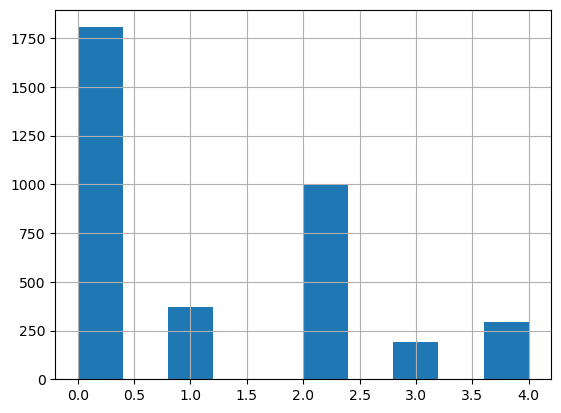

In [4]:
df.diagnosis.hist()

In [5]:
import cv2


In [6]:
img_list = []

for i in files[0:20]:
    image = cv2.imread('../diabetic_eye_find_backend/data/images/train_images/'+ i) # fotoğrafın okutulması
    newsize = (400,400) # fotoğrafın kırpılması için boyut girişi
    try:
      image = cv2.resize(image,(newsize))
    except:
      print(image)
    img_list.append(image) # fotoğrafın listeye eklenmesi

In [7]:
type(image)

numpy.ndarray

RGB -> BGR

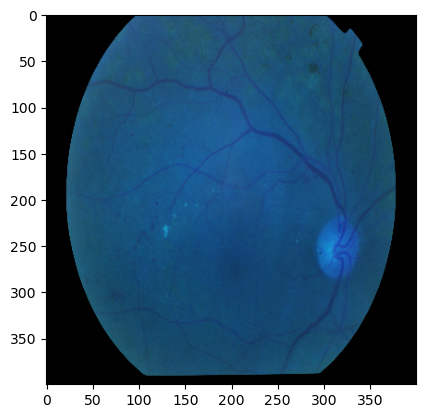

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img_list[5]) # mavi geldi çünkü renk kodları farklı RedGrayBlue

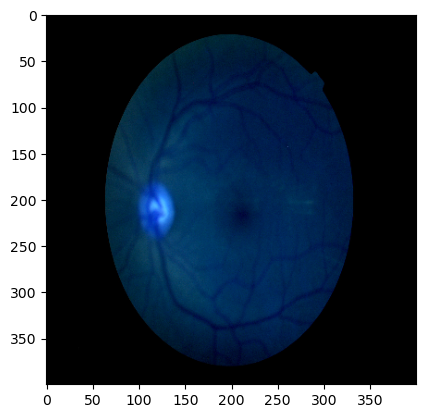

In [9]:
plt.imshow(img_list[4])

open cv görüntüleri rgb yerine bgr olarak okuyor, bu yüzden renklerde karışıklığa neden oluyor

In [10]:
img_list = []

for i in files[0:20]:
    image = cv2.imread('../diabetic_eye_find_backend/data/images/train_images/'+ i)
    newsize = (400,400)
    image = cv2.resize(image,(newsize))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)

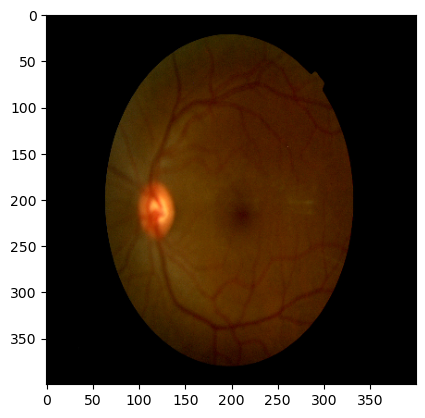

In [11]:
plt.imshow(img_list[4])

# görüntülerdeki siyah alanların boyutunu eşitlemek

treshold = 0 siyah 255 en parlak

In [12]:
kopya = img_list[4].copy()

In [13]:
kopya = cv2.cvtColor(kopya, cv2.COLOR_RGB2GRAY) # fotoğraf renklerinin griye çevrilmesi

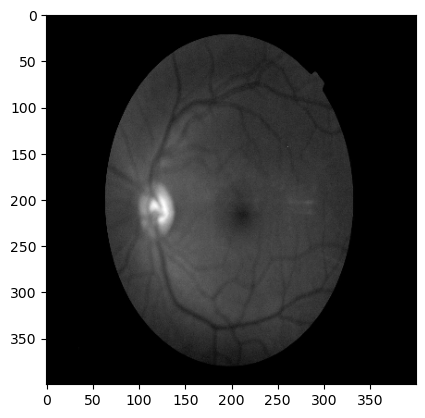

In [14]:
plt.imshow(kopya, cmap="gray")

In [15]:
kopya.shape

(400, 400)

bulanıklaştırma işlemi yapmak gereklidir


In [16]:
blur = cv2.GaussianBlur(kopya, (25,25), 0 )

# 5,5 blurlama yapılmak istenen çekirdek boyutu
# sigmaX = 0 değişikliklerin kaydolması demek
# GaussianBlur(src, ksize, sigmaX)

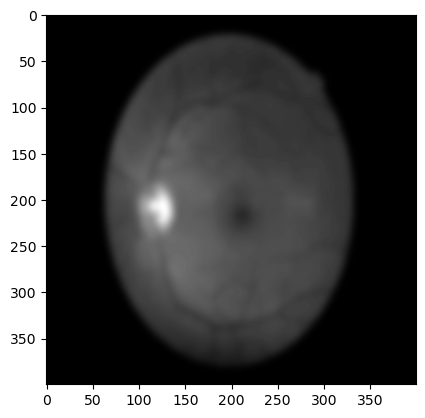

In [17]:
plt.imshow(blur, cmap="gray")

In [18]:
blur = cv2.GaussianBlur(kopya, (5,5), 0 )

# 5,5 blurlama yapılmak istenen çekirdek boyutu
# sigmaX = 0 değişikliklerin kaydolması demek
# GaussianBlur(src, ksize, sigmaX)

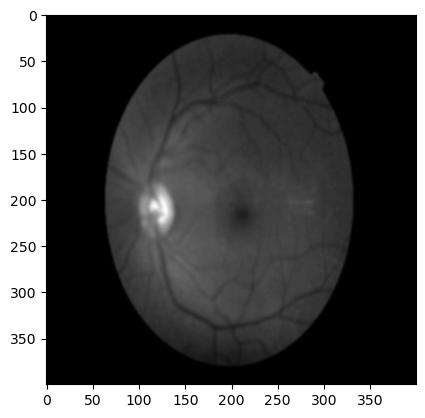

In [19]:
plt.imshow(blur, cmap="gray")

In [20]:
tresh = cv2.threshold(blur, 10,255, cv2.THRESH_BINARY)[1]

# 10 ve aşağısındaki tüm değerleri siyah üstündeki değerleri beyaz yapacak
# max değer 255 parlaklık -- resmin ne kadar beyaz olduğu
# bu kod normalde iki kod return eder ama ihtiyacımız olan değer sadece threshold olduğu için 1 dedik

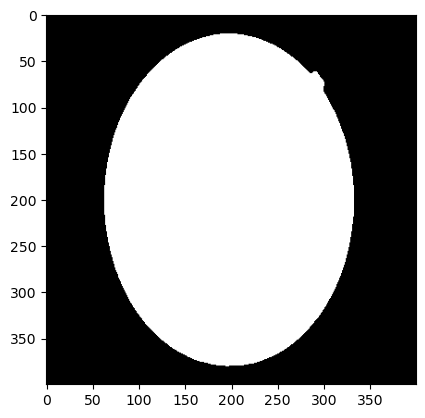

In [21]:
plt.imshow(tresh, cmap="gray")

görüntüdeki sınırları tespit etme

In [22]:
kontur = cv2.findContours(tresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours sınır demek
# RETR_EXT.. kenar koordinatları demektir
# SIMPLE direk çerçeve çizer
# bir de NONE var, üçgen dörtgen gibi şekillerin kenar noktalarını koyar

In [23]:
kontur

((array([[[188,  21]],
  
         [[187,  22]],
  
         [[181,  22]],
  
         [[180,  23]],
  
         [[177,  23]],
  
         [[176,  24]],
  
         [[173,  24]],
  
         [[172,  25]],
  
         [[169,  25]],
  
         [[168,  26]],
  
         [[166,  26]],
  
         [[165,  27]],
  
         [[163,  27]],
  
         [[162,  28]],
  
         [[160,  28]],
  
         [[159,  29]],
  
         [[158,  29]],
  
         [[157,  30]],
  
         [[155,  30]],
  
         [[154,  31]],
  
         [[153,  31]],
  
         [[152,  32]],
  
         [[151,  32]],
  
         [[150,  33]],
  
         [[149,  33]],
  
         [[148,  34]],
  
         [[147,  34]],
  
         [[146,  35]],
  
         [[145,  35]],
  
         [[143,  37]],
  
         [[142,  37]],
  
         [[141,  38]],
  
         [[140,  38]],
  
         [[138,  40]],
  
         [[137,  40]],
  
         [[135,  42]],
  
         [[134,  42]],
  
         [[131,  45]],
  
         [[1

In [24]:
# en altta da -1 lerden oluşan bir array var sınırlarınn hiyerarşi sırasına denir
# tek katmanlı bir sınır aldığımız için herhangi bir hiyerarşi sırası yok

# bizim de işimize yaramayacağı için sadece koordinatlar yeterli olacak

In [25]:
kontur = kontur[0][0] # sadece koordinatlar

In [26]:
kontur.shape

(452, 1, 2)

In [27]:
# 3 boyutlu olarak dönüş yaptı, hala 1 boyut fazla var 1 değerini atmalıyız

In [28]:
kontur = kontur[:,0,:]

In [29]:
kontur.shape # temizlemdi

(452, 2)

siyah alanlardan kurtulmak için sağ sol üst alt koordinatları almamız lazım

In [30]:
kontur[:,0].argmax()

335

In [31]:
kontur[308] # sağ tarafı verdi

array([318, 280], dtype=int32)

In [32]:
kontur[:,0].argmin()

111

In [33]:
kontur[103] # sol tarafı verdi

array([ 67, 155], dtype=int32)

In [34]:
sol = tuple (kontur [kontur[:,0].argmin()])
sağ = tuple (kontur [kontur[:,0].argmax()])
üst = tuple (kontur [kontur[:,1].argmin()])
alt = tuple (kontur [kontur[:,1].argmax()])

In [35]:
sol, sağ, üst, alt

((63, 185), (332, 218), (188, 21), (194, 380))

In [36]:
x1= sol [0]
y1 = üst [1]
x2 = sağ[0]
y2= alt [1]

In [37]:
x1, y1, x2, y2


(63, 21, 332, 380)

In [38]:
orijinal = img_list [4].copy()

# kırpma işlemi yapmak için orjinal görüntnün kopyasını oluşturalım

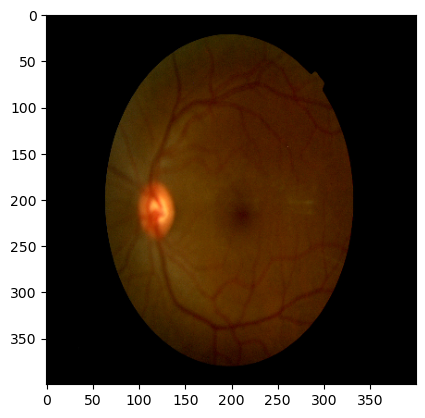

In [39]:
plt.imshow (orijinal)

In [40]:
crop_ilk = orijinal [y1:y2, x1:x2]

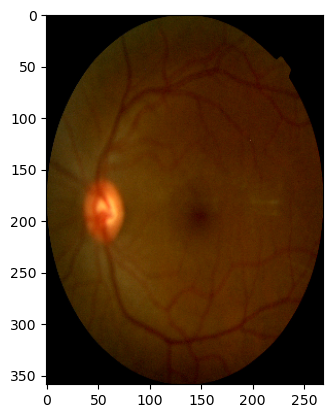

In [41]:
plt.imshow (crop_ilk)

In [42]:
crop_ilk = cv2.resize (crop_ilk, (400,400))

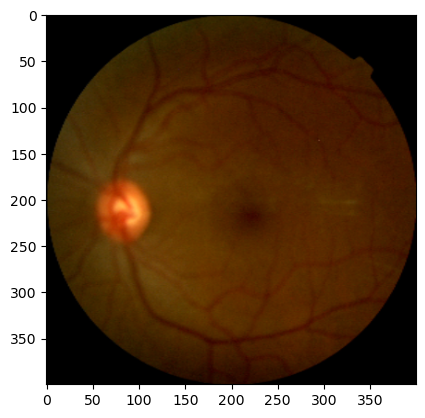

In [43]:
plt.imshow (crop_ilk)

In [44]:
x = int(x2-x1) *4//100
y =int(y2-y1)*5//100

In [45]:
x,y

(10, 17)

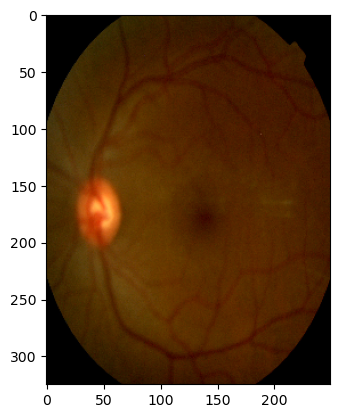

In [46]:
crop_son = orijinal [y1+y: y2-y, x1+x : x2-x]
plt.imshow (crop_son)

In [47]:
crop_son = cv2.resize (crop_son, (400,400))

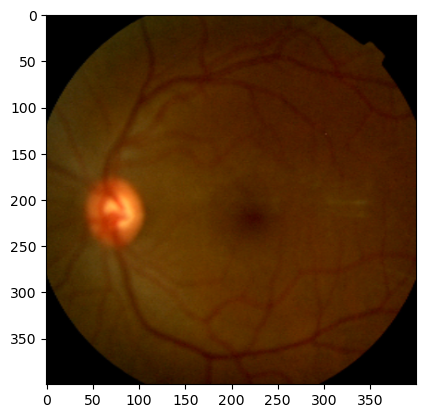

In [48]:
plt.imshow (crop_son)

# renk ile ilgili ön işlemeler

LAB renk haritası

L light parlaklık
A yeşil kırmızı
B mavi sarı

In [49]:
lab = cv2.cvtColor (crop_son, cv2.COLOR_RGB2LAB)

In [50]:
lab.shape

(400, 400, 3)

In [51]:
l,a,b= cv2.split (lab)

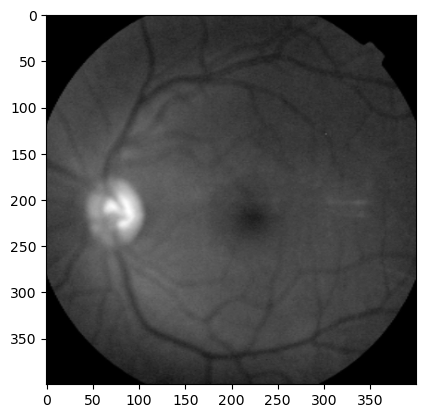

In [52]:
plt.imshow (l, cmap="gray")

# l içerisinde görüntünün parlaklık değerleri yer alıyor

In [53]:
clahe = cv2.createCLAHE (clipLimit=7.0,tileGridSize=((8,8)))

# 7 limitinde eğer daha üzerinde bir değer bulursa 8*8 olarak dağılır

In [54]:
cl = clahe.apply(l)

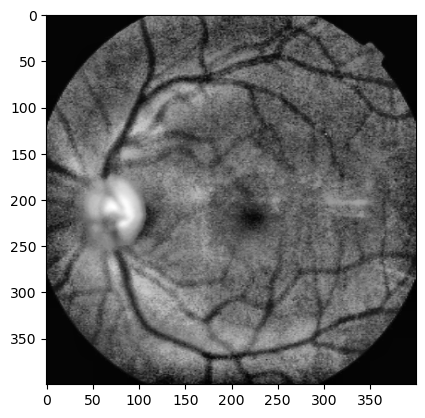

In [55]:
plt.imshow (cl, cmap="gray")


In [56]:
limg = cv2.merge ((cl,a,b)) # merge birleştir

In [57]:
son = cv2.cvtColor (limg, cv2.COLOR_LAB2RGB)

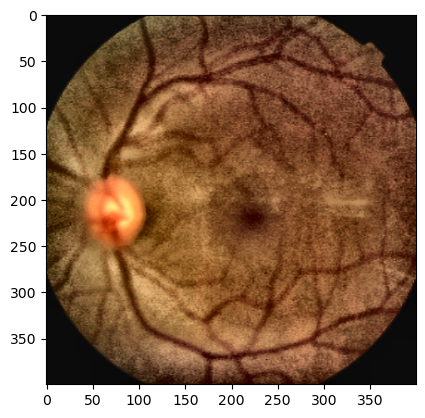

In [58]:
plt.imshow (son)

görüntü üzerinde bazı kumlanmalar var bunu azaltmak gerek

In [59]:
med_son = cv2.medianBlur (son, 3)

# sadece tek değer alır, büyüdükçe artar
# kumlanma azalır ama bulanık artar

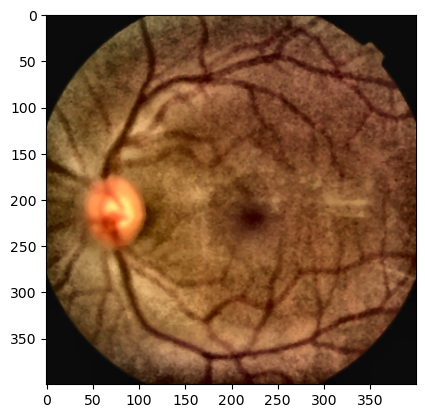

In [60]:

plt.imshow (med_son)

kanlanmaları da meydana çıkarmak için

In [61]:
arka_plan = cv2.medianBlur(son,37)

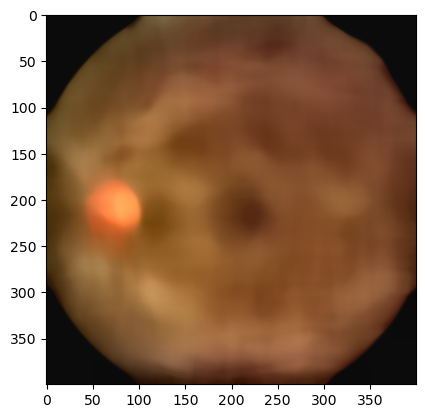

In [62]:
plt.imshow(arka_plan)

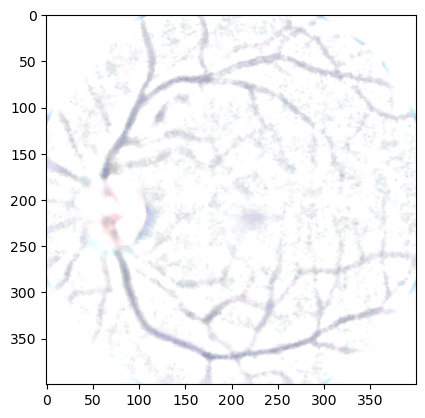

In [63]:
maske = cv2.addWeighted (med_son, 1, arka_plan, -1,255)
plt.imshow (maske)

In [64]:
son_img = cv2.bitwise_and(maske, med_son)

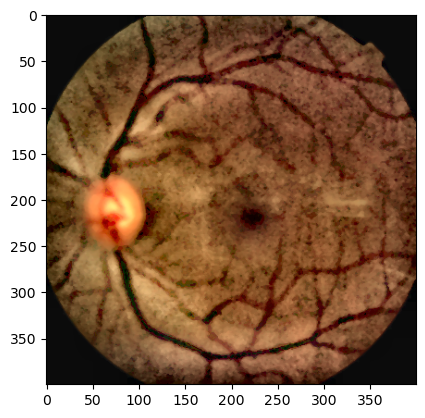

In [65]:
plt.imshow (son_img)

# ön işleme bitti foksiyon yapalım

In [66]:
import os
liste = os.listdir('../diabetic_eye_find_backend/data/images/train_images/')

In [67]:
len(liste)

3662

In [68]:
img_list = []
import cv2
from tqdm import tqdm

for i in tqdm (files):
    #new_path = pa
    image = cv2.imread('../diabetic_eye_find_backend/data/images/train_images/'+ i)
    image = cv2.resize(image, (400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    kopya = image.copy()
    kopya = cv2.cvtColor (kopya, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur (kopya, (5,5),0)
    thresh = cv2.threshold (blur, 10,255, cv2.THRESH_BINARY) [1] # 10 ve altında olanlar siyah üstünde olamlar beyaz
    kontur = cv2.findContours (thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # sınırları bul fotoğrafın
    kontur = kontur [0][0]
    kontur = kontur [:,0,:]
    x1 = tuple(kontur [kontur[:,0].argmin()])[0]
    y1 = tuple(kontur [kontur[:,1].argmin()]) [1]
    x2 = tuple(kontur [kontur[:,0].argmax()]) [0]
    y2 = tuple(kontur [kontur[:,1].argmax()]) [1]

    x = int (x2-x1) *4//50
    y = int(y2-y1) *5//50
    kopya2 = image.copy()
    if x2-x1 >100 and y2-y1> 100:
        kopya2 = kopya2 [y1+y: y2-y, x1+x: x2-x]
        kopya2 = cv2.resize(kopya2, (400,400))

    lab = cv2.cvtColor (kopya2, cv2.COLOR_RGB2LAB)
    l, a,b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8))) # parlaklığın azaltılması
    cl = clahe.apply(l)

    limg = cv2.merge((cl,a,b))
    son = cv2.cvtColor (limg, cv2.COLOR_LAB2RGB)
    med_son = cv2.medianBlur (son, 3)
    arka_plan = cv2.medianBlur (son, 37)
    maske = cv2.addWeighted (med_son,1,arka_plan,-1,255)
    son_img = cv2.bitwise_and(maske, med_son)
    img_list.append(son_img)

  0%|          | 0/3662 [00:00<?, ?it/s]

100%|██████████| 3662/3662 [05:15<00:00, 11.59it/s]


In [69]:
import numpy as np

np.savez('../diabetic_eye_find_backend/data/processed/img_list.npz', img_list)

In [70]:
len(img_list)

3662

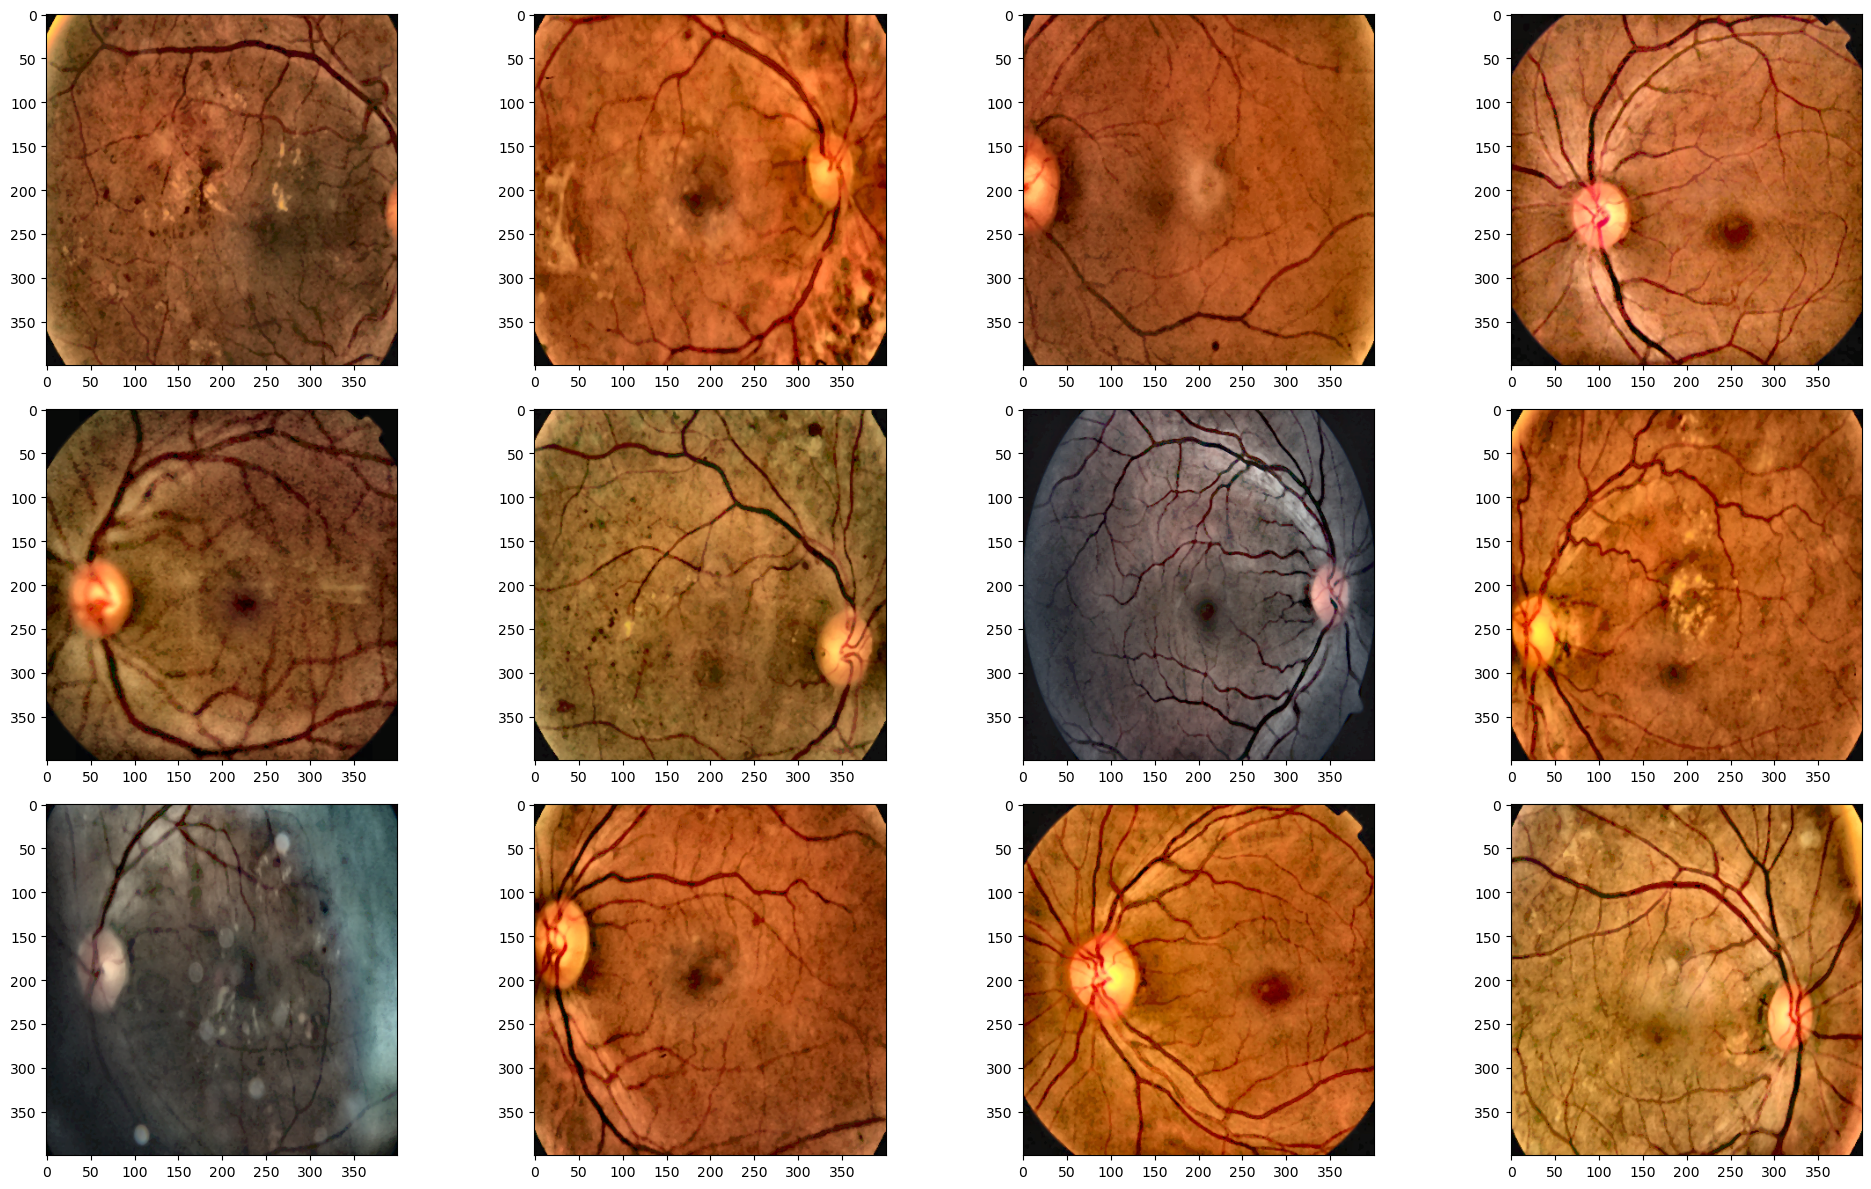

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,12))

for i in range(12):
    img = img_list[i]
    fig.add_subplot(3,4,i+1)
    plt.imshow(img)

plt.tight_layout()

# veri seti

In [72]:
df

id_code  diagnosis
0     000c1434d8d7          2
1     001639a390f0          4
2     0024cdab0c1e          1
3     002c21358ce6          0
4     005b95c28852          0
...            ...        ...
3657  ffa47f6a7bf4          2
3658  ffc04fed30e6          0
3659  ffcf7b45f213          2
3660  ffd97f8cd5aa          0
3661  ffec9a18a3ce          2

[3662 rows x 2 columns]

In [73]:
len(os.listdir('C:/Users/Sercan/Desktop/Projects/Python/diabetic_eye_find_backend/data/images/train_images'))

3662

In [74]:
df["diagnosis"]

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [75]:
y_train = pd.get_dummies(df["diagnosis"]).values

In [76]:
y_train

array([[False, False,  True, False, False],
       [False, False, False, False,  True],
       [False,  True, False, False, False],
       ...,
       [False, False,  True, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False]])

In [77]:
df["diagnosis"][0]

2

In [78]:
y_train[0]

array([False, False,  True, False, False])

In [79]:
import numpy as np
y_train_son = np.ones(y_train.shape, dtype="uint8")

In [80]:
y_train_son

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [81]:
y_train_son[:,4] = y_train[:,4]

In [82]:
y_train_son

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       ...,
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0]], dtype=uint8)

In [83]:
for i in range(3,-1,-1):
    y_train_son[:,i] = np.logical_or(y_train[:,i], y_train_son[:,i+1])

In [84]:
y_train_son

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       ...,
       [1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0]], dtype=uint8)

# train test

In [85]:
x_train = np.array(img_list)

In [86]:
x_train.shape

(3662, 400, 400, 3)

In [87]:
x_train

array([[[[ 2,  2,  0],
         [10, 10, 10],
         [10, 10, 10],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        [[10, 10, 10],
         [ 2,  2,  0],
         [10, 10, 10],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        [[10, 10, 10],
         [ 2,  2,  0],
         [ 2,  2,  0],
         ...,
         [ 8,  9,  8],
         [ 8,  9,  8],
         [ 8,  9,  8]],

        ...,

        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [15, 15, 15],
         [15, 15, 15],
         [15, 15, 15]],

        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [15, 15, 15],
         [15, 15, 15],
         [15, 15, 15]],

        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [15, 15, 15],
         [15, 15, 15],
         [15, 15, 15]]],


       [[[10, 10, 10],
         [10, 10, 10],
         [10, 

In [88]:
y_train_son.shape


(3662, 5)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train.shape

(3662, 400, 400, 3)

In [91]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train_son,
                                                  test_size=0.15,
                                                  random_state=2019,
                                                  shuffle=True)

In [92]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3112, 400, 400, 3), (550, 400, 400, 3), (3112, 5), (550, 5))

In [93]:
from keras.preprocessing.image import ImageDataGenerator

In [94]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [95]:
data_generator = datagen.flow(x_train, y_train, batch_size=2, seed=2020)

In [96]:
!pip install efficientnet

In [97]:
from efficientnet.keras import EfficientNetB5

In [98]:
örnek_model = EfficientNetB5()

In [99]:
örnek_model.summary()

Model: "efficientnet-b5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 456, 456, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 228, 228, 48)         1296      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 228, 228, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 228, 228, 48)         0         ['stem_bn[0][0]'

In [100]:
örnek_model2 = EfficientNetB5(include_top=False)

In [101]:
örnek_model.summary()

Model: "efficientnet-b5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 456, 456, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 228, 228, 48)         1296      ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 228, 228, 48)         192       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 228, 228, 48)         0         ['stem_bn[0][0]'

In [102]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(EfficientNetB5(weights="imagenet", include_top=False, input_shape = (400,400,3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5,activation = "sigmoid"))






In [103]:
from keras.optimizers import Adam

In [104]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.00005), metrics=["accuracy"]) # mean absolute error, mean squared error

In [105]:
from keras.callbacks import ReduceLROnPlateau
lr = ReduceLROnPlateau(monitor = "val_los",
                       patience = 3,
                       verbose = 1,
                       mode = "auto",
                       factor=0.25,
                       min_lr=0.000001)

In [106]:
history = model.fit_generator(data_generator,
                              steps_per_epoch = 1000,
                              epochs = 1,
                              validation_data= (x_val, y_val),
                              callbacks = [lr])

C:\Users\Sercan\AppData\Local\Temp\ipykernel_18512\205802360.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator,


1000/1000 [==============================] - ETA: 0s - loss: 0.3075 - accuracy: 0.9935WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_los` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


1000/1000 [==============================] - 3496s 3s/step - loss: 0.3075 - accuracy: 0.9935 - val_loss: 0.1833 - val_accuracy: 0.9891 - lr: 0.0010
